# Part 2: Naive Bayes, KNN, and Decision Tree


---



**1. Data Preprocessing**
---------------

* Import relevant libraries


---



In [111]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.neighbors import KNeighborsClassifier


*
Load and Read the dataset.


---



In [112]:
df=pd.read_csv('/content/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


* Explore Dataset

In [113]:
print("Shape of Data\n")
print(df.shape)
print('------------------------------------------------------------')

print("\nInfo. of Data\n")
display(df.info())
print('------------------------------------------------------------')

print("\nValue count in data\n")
for col in df:
  print(f"\nValue count in {col}")
  print(df[col].value_counts())
  print("----------------------------------------------------------")


Shape of Data

(400, 5)
------------------------------------------------------------

Info. of Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


None

------------------------------------------------------------

Value count in data


Value count in User ID
User ID
15707634    1
15715622    1
15670615    1
15683758    1
15749381    1
           ..
15804002    1
15603246    1
15668575    1
15810944    1
15624510    1
Name: count, Length: 400, dtype: int64
----------------------------------------------------------

Value count in Gender
Gender
Female    204
Male      196
Name: count, dtype: int64
----------------------------------------------------------

Value count in Age
Age
35    32
37    20
26    16
42    16
41    16
39    15
40    15
48    14
47    14
27    13
38    13
36    12
46    12
28    12
30    11
31    11
49    10
29    10
32     9
24     9
33     9
60     7
45     7
19     7
59     7
20     7
25     6
52     6
58     6
23     6
34     6
18     5
22     5
57     5
53     5
21     4
54     4
50     4
55     3
51     3
56     3
43     3
44     2
Name: count, dtype: int64
-----------------------------------------------------

* Statistical Summary


---



In [ ]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


* Handle Missing values


---



In [114]:
print('Missing Values in all Categories\n')
print(df.isnull().sum())
# no missing values

Missing Values in all Categories

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


* Detecting Duplicates


---


In [115]:
df.duplicated().sum()
# No duplicates found

np.int64(0)

Drop the User ID column

In [116]:
df.drop('User ID',axis=1,inplace=True)

* Detecting Outliers and Dealing with them


---


In [118]:
df.columns

Index(['Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [119]:
# Separated numerical columns,excluded out columns that requires integrity of it's data to remain intact.
numerical = df[['Age',	'EstimatedSalary',	'Purchased']]

# Count of outliers in each numerical column
for col in numerical:
  Q1=numerical[col].quantile(0.25)
  Q3=numerical[col].quantile(0.75)
  IQR=Q3-Q1
  lower_bound=Q1-1.5*IQR
  upper_bound=Q3+1.5*IQR
  outliers=numerical[(numerical[col]<lower_bound) | (numerical[col]>upper_bound)]
  print(f"\n Count of Outliers in {col}: {len(outliers)}\n")
  print('-----------------------------------------------')

# No outliers found


 Count of Outliers in Age: 0

-----------------------------------------------

 Count of Outliers in EstimatedSalary: 0

-----------------------------------------------

 Count of Outliers in Purchased: 0

-----------------------------------------------


Encode the Gender column using Label Encoding or One-Hot Encoding.

In [120]:
df_encoded=pd.get_dummies(df,columns=['Gender'],drop_first=True)
df_encoded.head()

,Age,EstimatedSalary,Purchased,Gender_Male
0,19,19000,0,True
1,35,20000,0,True
2,26,43000,0,False
3,27,57000,0,False
4,19,76000,0,True


* Encode the target variable Purchased.


---



In [121]:
df_encoded['Purchased'].value_counts()


,count
Purchased,
0,257
1,143


*Purchased column already contains 0 and 1, no encoding is needed for that variable.*

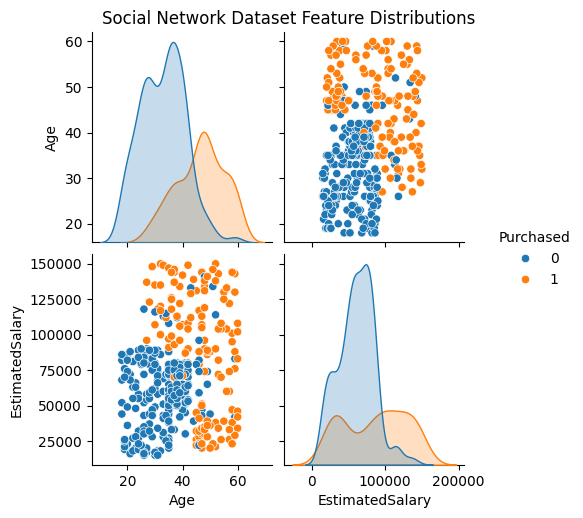

In [122]:
sns.pairplot(df, hue='Purchased')
plt.suptitle("Social Network Dataset Feature Distributions", y=1.02)
plt.show()

**2. Model Building**
--



* Defining Features(X) and Target(y)


---



In [124]:
X=df_encoded.drop('Purchased',axis=1)
y=df_encoded['Purchased']

*  Splitting data into training and test sets.


---



In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [127]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

**Gaussian Naive Bayes**


---



*  Initialize and train the Naive Bayes classifier

In [128]:
model = GaussianNB()
model.fit(X_train_df, y_train)

GaussianNB()

* Predicting on test dataset

In [129]:
y_pred = model.predict(X_test_df)

*  Computing the Confusion Matrix

In [130]:
cm = confusion_matrix(y_test, y_pred)

* Plotting the confusion matrix

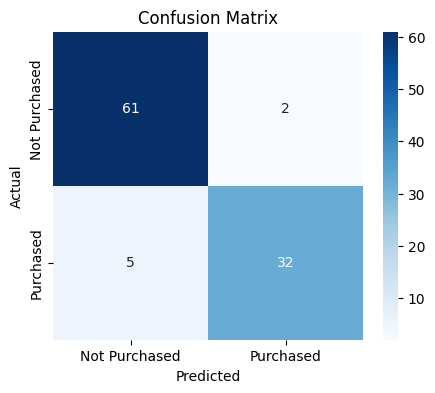

In [131]:
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Purchased', 'Purchased'], yticklabels=['Not Purchased', 'Purchased'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

* Genrating Classification Report

In [161]:
print(f'\nAccuracy: { accuracy_score(y_test, y_pred)}\n')
print(" Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=['Not Purchased', 'Purchased']))


Accuracy: 0.93

 Classification Report:

               precision    recall  f1-score   support

Not Purchased       0.92      0.97      0.95        63
    Purchased       0.94      0.86      0.90        37

     accuracy                           0.93       100
    macro avg       0.93      0.92      0.92       100
 weighted avg       0.93      0.93      0.93       100



**Decision Tree ( both Gini and Entropy )**


---



* Importing required tools

In [133]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

* Training Decision Tree ( Gini and Entropy )

In [134]:
cl_gini = DecisionTreeClassifier(criterion="gini", random_state=42)
cl_gini.fit(X_train_df, y_train)



DecisionTreeClassifier(random_state=42)

In [135]:
cl_entropy = DecisionTreeClassifier(criterion="entropy", random_state=42)
cl_entropy.fit(X_train_df, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=42)

* Predicting on test data

In [136]:
y_pred_gini=cl_gini.predict(X_test_df)
y_pred_entropy=cl_entropy.predict(X_test_df)

*  Evaluate model

In [137]:
print("\nEvaluation for Gini model\n ")
print("Accuracy:", accuracy_score(y_test, y_pred_gini))
print("\nClassification Report:\n", classification_report(y_test, y_pred_gini))
print("--------------------------------------------------------------------")

print("\nEvaluation for Entropy model\n ")
print("Accuracy:", accuracy_score(y_test, y_pred_entropy))
print("\nClassification Report:\n", classification_report(y_test, y_pred_entropy))
print("--------------------------------------------------------------------")




Evaluation for Gini model
 
Accuracy: 0.84

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.89      0.88        63
           1       0.80      0.76      0.78        37

    accuracy                           0.84       100
   macro avg       0.83      0.82      0.83       100
weighted avg       0.84      0.84      0.84       100

--------------------------------------------------------------------

Evaluation for Entropy model
 
Accuracy: 0.85

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.89      0.88        63
           1       0.81      0.78      0.79        37

    accuracy                           0.85       100
   macro avg       0.84      0.84      0.84       100
weighted avg       0.85      0.85      0.85       100

--------------------------------------------------------------------


*  Confusion Matrix

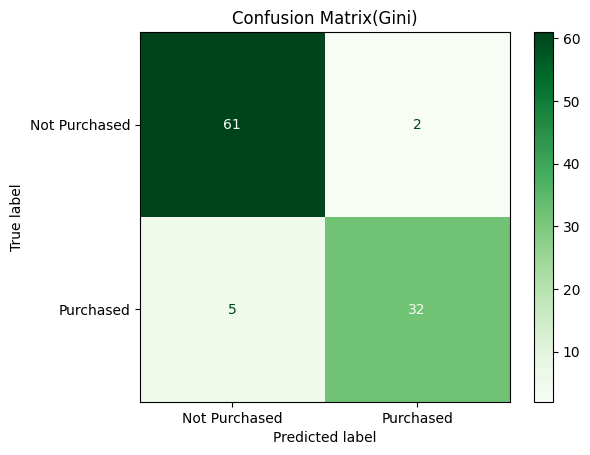

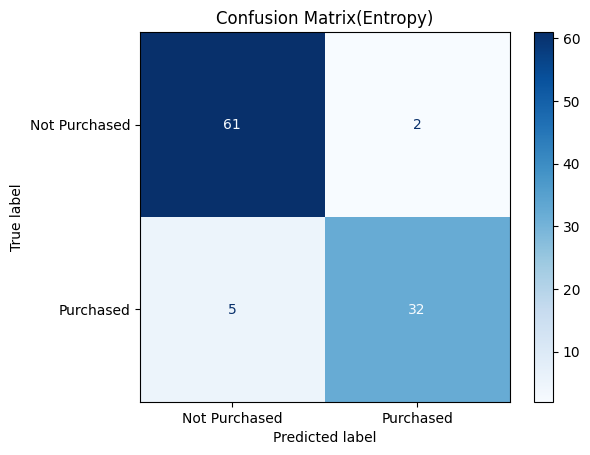

In [138]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
subplot=(1,2,1)
cm1 = confusion_matrix(y_test, y_pred_gini)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Not Purchased', 'Purchased'])
disp.plot(cmap="Greens")
plt.title("Confusion Matrix(Gini)")
plt.show()

subplot=(1,2,2)
cm2 = confusion_matrix(y_test, y_pred_entropy)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Not Purchased', 'Purchased'])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix(Entropy)")
plt.show()

In [139]:
X_train_df.columns

Index(['Age', 'EstimatedSalary', 'Gender_Male'], dtype='object')

* Visualize decision tree

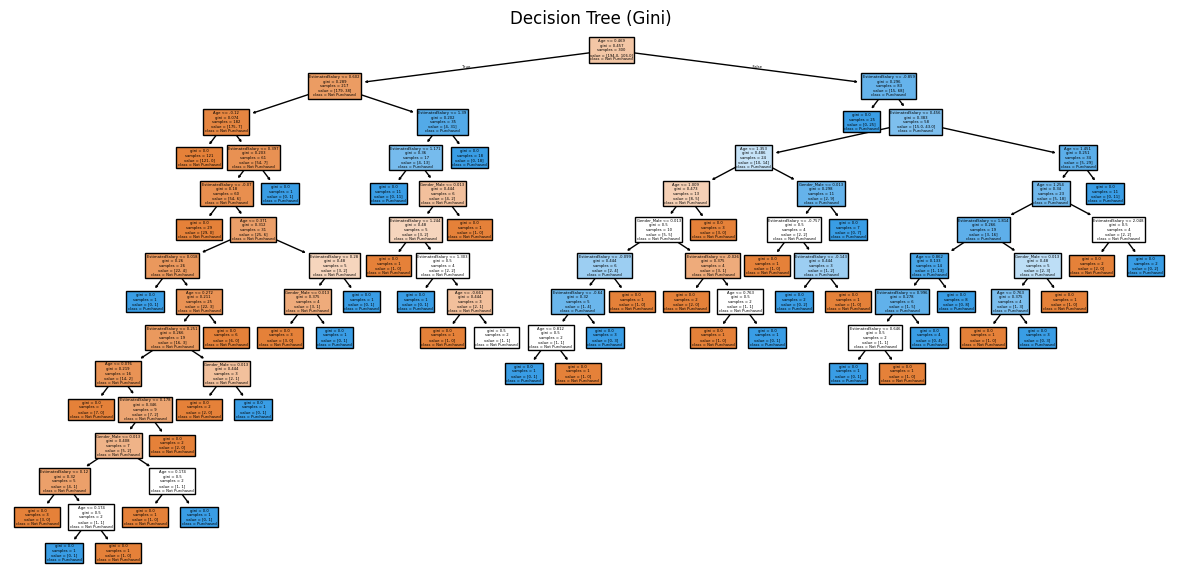

In [141]:
# Plot Decision Tree (Gini)
plt.figure(figsize=(15, 7))
plot_tree(cl_gini, feature_names=["Age", "EstimatedSalary","Gender_Male"], class_names=["Not Purchased", "Purchased"], filled=True)
plt.title("Decision Tree (Gini)")
plt.show()


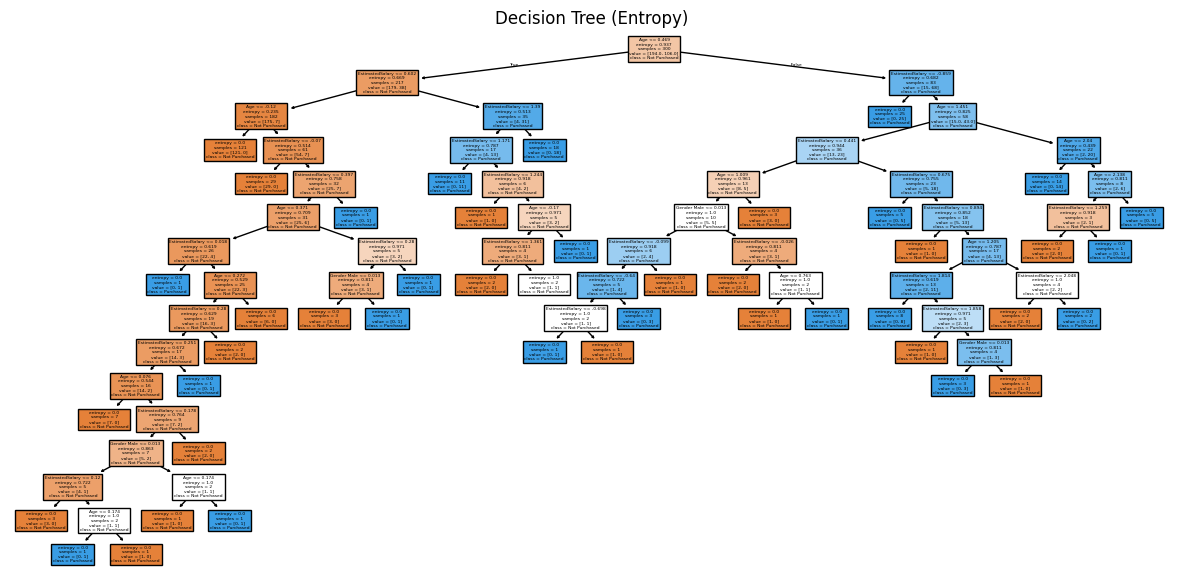

In [142]:
# Plot Decision Tree (Entropy)
plt.figure(figsize=(15, 7))
plot_tree(cl_entropy, feature_names=["Age", "EstimatedSalary","Gender Male"], class_names=["Not Purchased", "Purchased"], filled=True)
plt.title("Decision Tree (Entropy)")
plt.show()

**K-Nearest Neighbors (testing with k=3, 5, and 7)**


---



* Train KNN classifier

In [148]:
k3 = 3
knn3 = KNeighborsClassifier(n_neighbors=k3)
knn3.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [147]:
k5 = 5
knn5 = KNeighborsClassifier(n_neighbors=k5)
knn5.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [149]:
k7 = 7
knn7 = KNeighborsClassifier(n_neighbors=k7)
knn7.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=7)

*  Predict on test data

In [150]:
y_pred3 = knn3.predict(X_test_scaled)
y_pred5 = knn5.predict(X_test_scaled)
y_pred7 = knn7.predict(X_test_scaled)

* Confusion Matrix

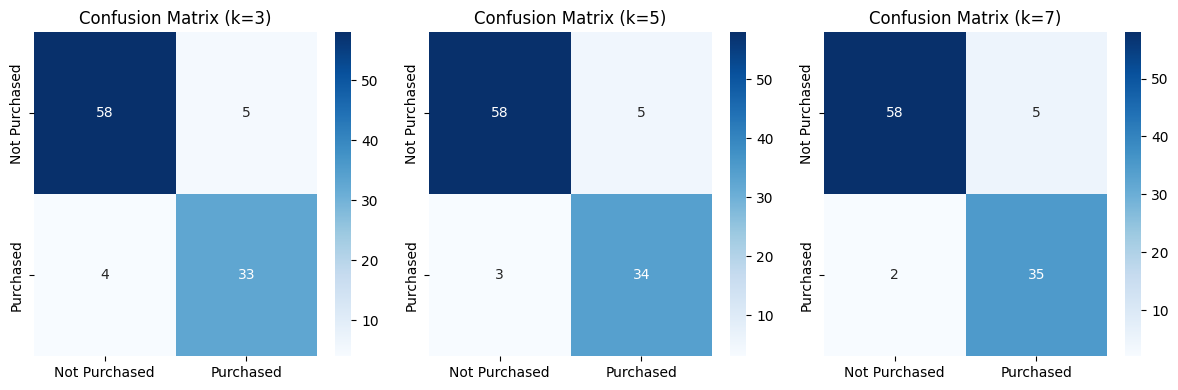

In [152]:
cm3 = confusion_matrix(y_test, y_pred3)
cm5 = confusion_matrix(y_test, y_pred5)
cm7 = confusion_matrix(y_test, y_pred7)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.heatmap(cm3, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Purchased', 'Purchased'], yticklabels=['Not Purchased', 'Purchased'])
plt.title('Confusion Matrix (k=3)')

plt.subplot(1, 3, 2)
sns.heatmap(cm5, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Purchased', 'Purchased'], yticklabels=['Not Purchased', 'Purchased'])
plt.title('Confusion Matrix (k=5)')

plt.subplot(1, 3, 3)
sns.heatmap(cm7, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Purchased', 'Purchased'], yticklabels=['Not Purchased', 'Purchased'])
plt.title('Confusion Matrix (k=7)')

plt.tight_layout()
plt.show()

* Model Evaluation

In [154]:
print(f"\nAccuracy for k=3: {accuracy_score(y_test, y_pred3):.4f}\n")
print("\nClassification Report for KNN (k=3)\n")
print(classification_report(y_test, y_pred3, target_names=["Not Purchased", "Purchased"]))
print('-----------------------------------------------------------------------------------------')

print(f"\nAccuracy for k=5: {accuracy_score(y_test, y_pred5):.4f}\n")
print("\nClassification Report for KNN (k=5)\n")
print(classification_report(y_test, y_pred5, target_names=["Not Purchased", "Purchased"]))
print('-----------------------------------------------------------------------------------------')

print(f"\nAccuracy for k=7: {accuracy_score(y_test, y_pred7):.4f}\n")
print("\nClassification Report for KNN (k=7)\n")
print(classification_report(y_test, y_pred7, target_names=["Not Purchased", "Purchased"]))
print('-------------------------------------------------------------------------------------------')


Accuracy for k=3: 0.9100


Classification Report for KNN (k=3)

               precision    recall  f1-score   support

Not Purchased       0.94      0.92      0.93        63
    Purchased       0.87      0.89      0.88        37

     accuracy                           0.91       100
    macro avg       0.90      0.91      0.90       100
 weighted avg       0.91      0.91      0.91       100

-----------------------------------------------------------------------------------------

Accuracy for k=5: 0.9200


Classification Report for KNN (k=5)

               precision    recall  f1-score   support

Not Purchased       0.95      0.92      0.94        63
    Purchased       0.87      0.92      0.89        37

     accuracy                           0.92       100
    macro avg       0.91      0.92      0.92       100
 weighted avg       0.92      0.92      0.92       100

-----------------------------------------------------------------------------------------

Accuracy for k=7: 0.930

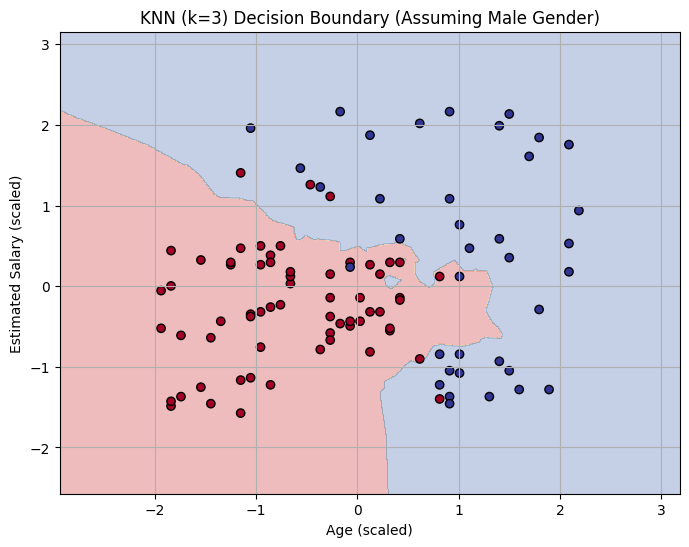

In [158]:
import numpy as np
h = 0.01
# Accessing the first column (Age) and second column (EstimatedSalary) of the scaled test data using .iloc
x_min, x_max = X_test_scaled[:, 0].min() - 1, X_test_scaled[:, 0].max() + 1
y_min, y_max = X_test_scaled[:, 1].min() - 1, X_test_scaled[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = knn3.predict(np.c_[xx.ravel(), yy.ravel(), np.ones_like(xx.ravel())]) # Added the third feature
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
#  the first two columns of the scaled test data for plotting the scatter points
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_test, cmap=plt.cm.RdYlBu, edgecolor='k')
plt.title("KNN (k=3) Decision Boundary (Assuming Male Gender)")
plt.xlabel("Age (scaled)")
plt.ylabel("Estimated Salary (scaled)")
plt.grid(True)
plt.show()